In [ ]:
import pandas as pd
import numpy as np
#data_bn=pd.read_excel('data_schema_v3.xlsx')

In [10]:
xls = pd.ExcelFile('data_schema_v3.xlsx')
customer = pd.read_excel(xls, 'Customers')
customer_assets = pd.read_excel(xls, 'Customer_Assets')
asset_obj=pd.read_excel(xls,'Asset_Objectives')
customer_ans=pd.read_excel(xls,'Customer_Answers')
questions=pd.read_excel(xls,'Questions')
answers=pd.read_excel(xls,'Answers')
risk_prof=pd.read_excel(xls,'Risk_Profile')
asset_classes=pd.read_excel(xls,'Asset_Classes')
fee=pd.read_excel(xls,'Fee_Structures')


In [12]:
answers.head(2)

,Question_ID,Answer_ID,ANSWER_TEXT,Risk_Profile_ID
0,1,1,1-5 Years,1
1,1,2,5-10 Years,2


In [23]:
merged_df=pd.merge(customer_ans,answers,on=['Question_ID','Answer_ID'],how='outer')

In [24]:
merged_df.sort_values(by='Customer_ID',inplace=True)

In [29]:
merged_df.dropna(inplace=True)

In [30]:
avg_score=merged_df.groupby('Customer_ID')['Risk_Profile_ID'].mean()

In [39]:
score_dict=avg_score.to_dict()

In [40]:
score_dict

{1: 2.8333333333333335,
 2: 4.0,
 3: 3.0,
 4: 2.8333333333333335,
 5: 2.8333333333333335,
 6: 2.8333333333333335,
 7: 2.8333333333333335,
 8: 2.8333333333333335,
 9: 2.8333333333333335,
 10: 2.8333333333333335,
 11: 2.8333333333333335,
 12: 2.8333333333333335,
 13: 3.0,
 14: 2.7142857142857144,
 15: 3.1666666666666665,
 16: 3.2,
 17: 3.875,
 18: 2.857142857142857,
 19: 2.8333333333333335,
 20: 2.625,
 21: 2.857142857142857,
 22: 2.2857142857142856,
 23: 3.5,
 24: 2.857142857142857,
 25: 3.142857142857143,
 26: 3.7142857142857144,
 27: 2.4285714285714284,
 28: 3.0,
 29: 3.4285714285714284,
 30: 2.7142857142857144,
 31: 2.0,
 32: 3.0,
 33: 2.7142857142857144,
 34: 3.375,
 35: 2.5,
 36: 2.5,
 37: 2.8333333333333335,
 38: 2.8,
 39: 2.8333333333333335,
 40: 2.8333333333333335,
 41: 3.2,
 42: 2.8333333333333335,
 43: 2.8333333333333335,
 44: 2.5714285714285716,
 45: 2.625,
 46: 3.3333333333333335,
 47: 2.857142857142857,
 48: 3.6666666666666665,
 49: 3.142857142857143,
 50: 3.666666666666666

In [41]:
has_zero=any(value==0 for value in score_dict.values())

In [42]:
has_zero

False

In [43]:
risk_score_df=pd.DataFrame(score_dict.items(), columns=['Customer_ID', 'Risk_Score'])

In [44]:
risk_score_df

,Customer_ID,Risk_Score
0,1,2.833333
1,2,4.000000
2,3,3.000000
3,4,2.833333
4,5,2.833333
...,...,...
9995,9996,3.142857
9996,9997,2.857143
9997,9998,2.833333
9998,9999,2.833333


In [48]:
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']>=2]
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']<=4]


In [50]:
# Analysis of Customer Asset Vs Objectives

In [51]:
customer_assets.head()

,Customer_ID,Asset_Objective_ID,Total
0,1,1,1.157902e+05
1,2,1,1.991070e+06
2,3,1,1.569350e+06
3,4,1,2.162568e+06
4,5,1,1.366450e+06


Customer with Max Asset: 718
 Asset: Customer_ID
1     3.715898e+06
2     7.230893e+06
3     5.871863e+06
4     1.274188e+07
5     8.836557e+06
6     8.818253e+06
7     1.259432e+07
8     8.972242e+06
9     6.891288e+06
10    1.041533e+07
Name: Total, dtype: float64


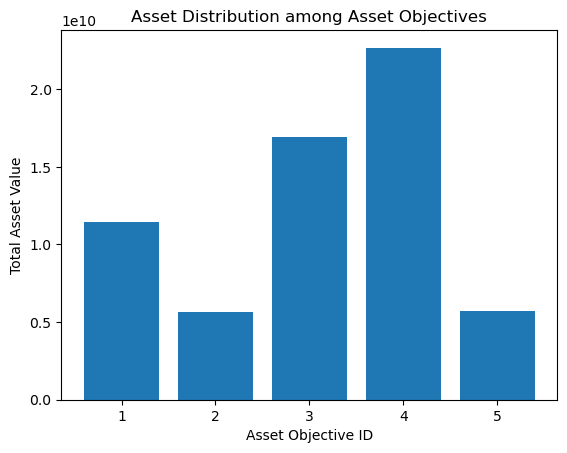

In [63]:
import matplotlib.pyplot as plt

 
# Customer with Max Asset

max_asset_customer = customer_assets.groupby('Customer_ID')['Total'].sum().idxmax()

 

print("Customer with Max Asset:", max_asset_customer)

max_asset_customer2 = customer_assets.groupby('Customer_ID')['Total'].sum()

 

print(" Asset:", max_asset_customer2[:10])

 

# Asset Distribution among Asset Objectives

asset_distribution = customer_assets.groupby('Asset_Objective_ID')['Total'].sum()

 

# bar chart to visualize the distribution

plt.bar(asset_distribution.index, asset_distribution.values)

plt.xlabel('Asset Objective ID')

plt.ylabel('Total Asset Value')

plt.title('Asset Distribution among Asset Objectives')

plt.show()